In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [162]:
glass = pd.read_csv('glass.csv')

In [163]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [164]:
import missingno

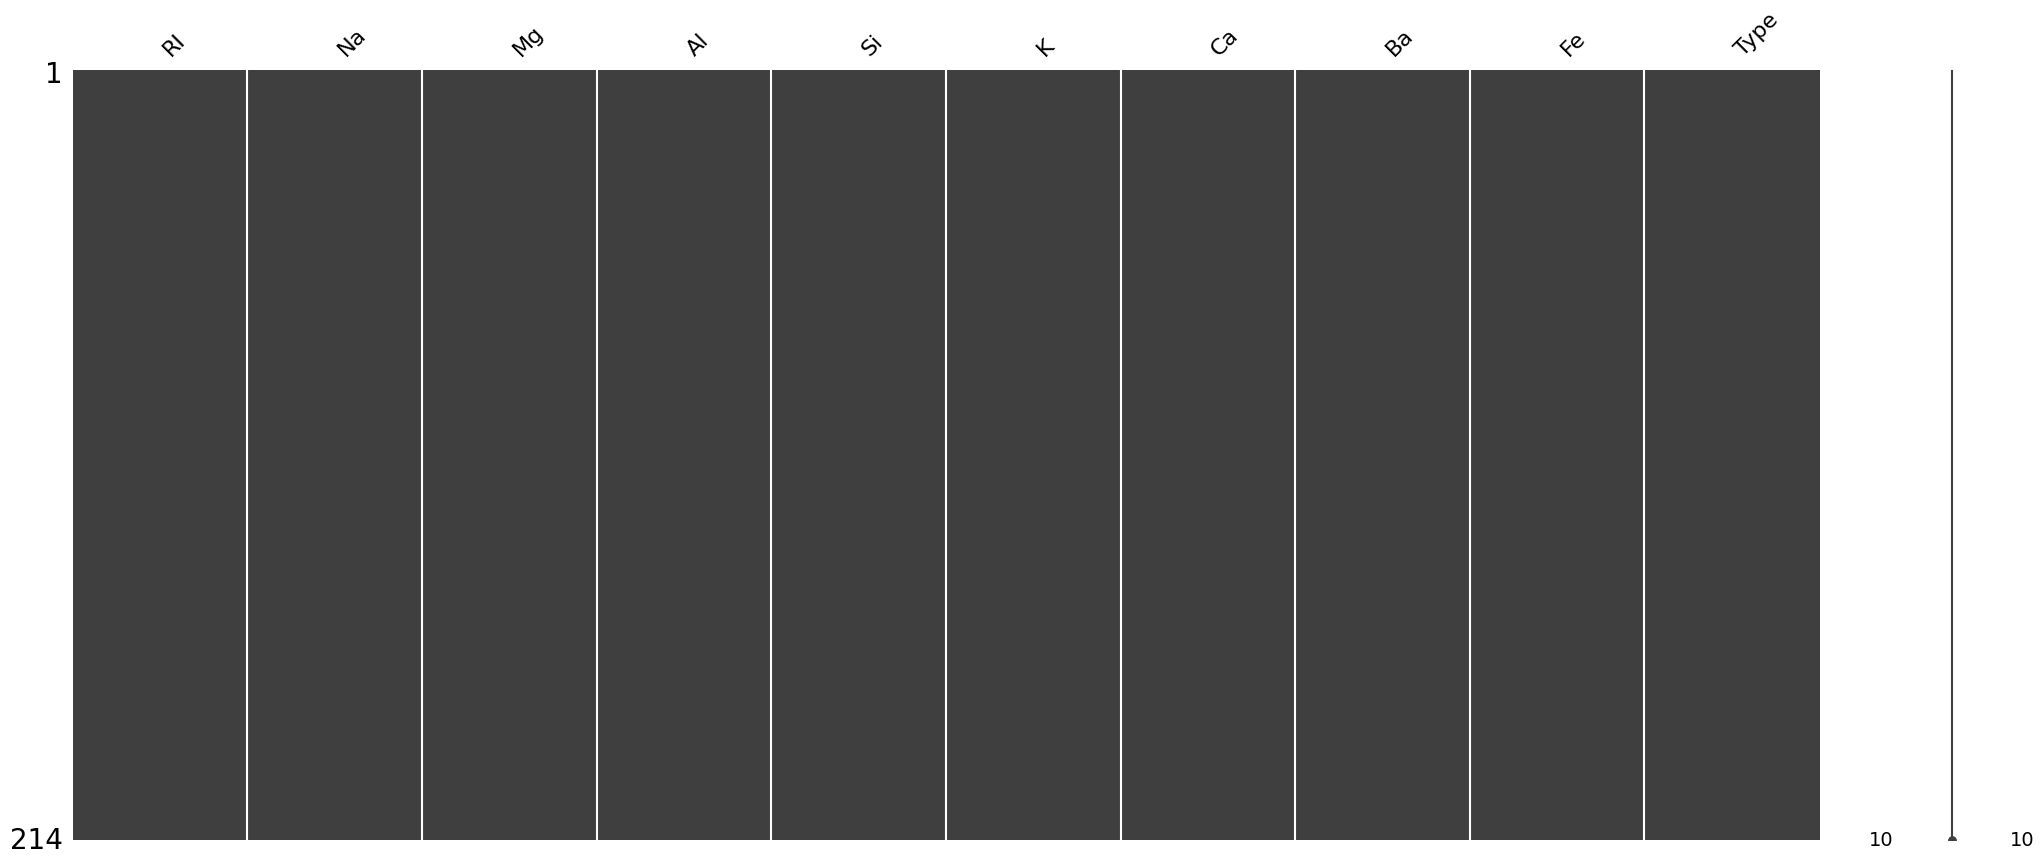

In [165]:
missingno.matrix(glass)
plt.savefig('missingno')
plt.show()

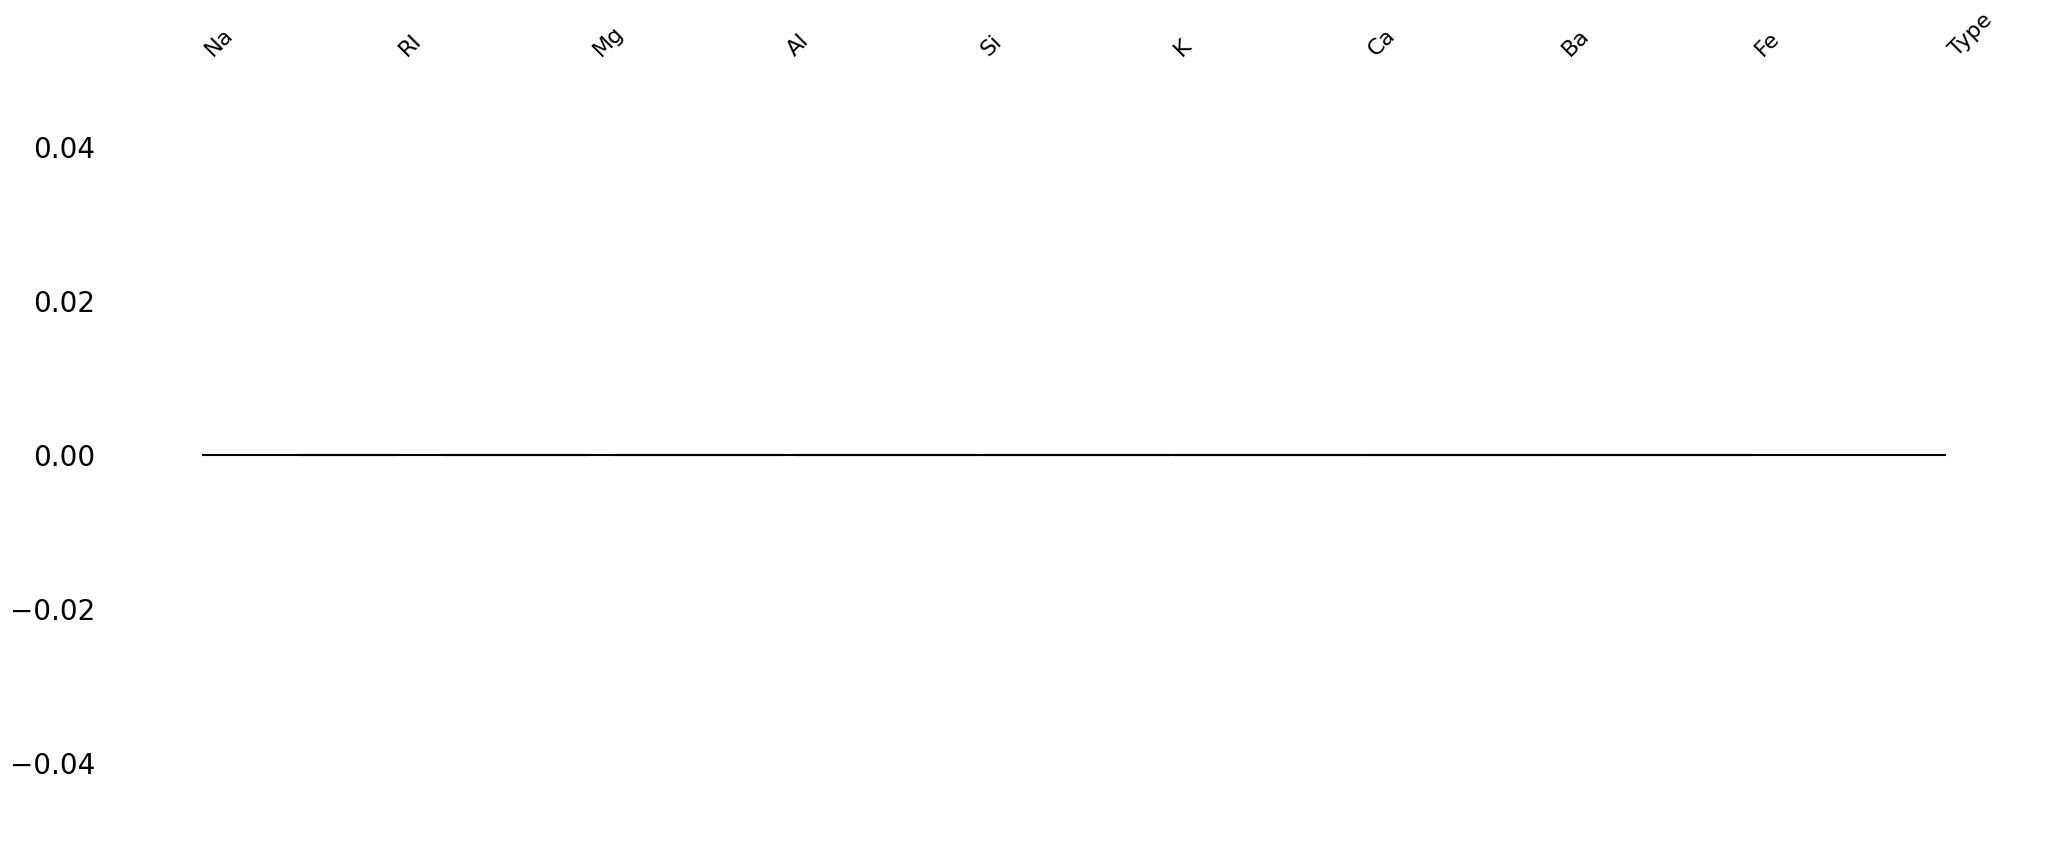

In [166]:
missingno.dendrogram(glass)
plt.savefig('dentogram')
plt.show()

In [167]:
glass.shape

(214, 10)

In [168]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [169]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [171]:
glass_feature = glass.drop(['Type'],axis=1)
glass_feature

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [172]:
vif_list = []
for i in  range(0,glass_feature.shape[1]):
    vif = variance_inflation_factor(glass_feature.to_numpy(), i)
    vif_list.append(vif)
    
vif_list

[725048.5760683843,
 13890.374402643007,
 795.895473592158,
 175.09265188938977,
 366484.18284348754,
 56.83288426175108,
 8031.654306186353,
 27.374303979130655,
 1.5973138603451569]

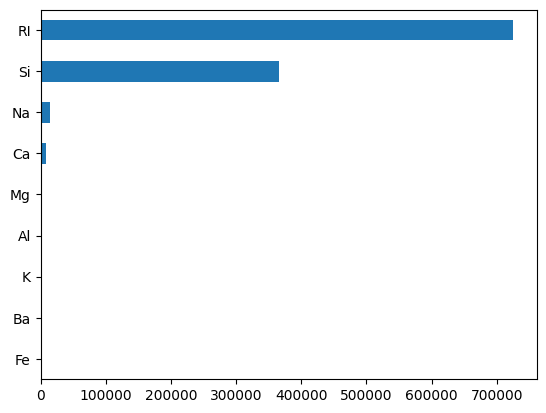

In [173]:
s1 = pd.Series(vif_list, index=glass_feature.columns)
s1.sort_values().plot(kind='barh')
plt.savefig('vif')
plt.show()

In [174]:
glass.cov()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,9.222541e-06,-0.000476,-0.000536,-0.000618,-0.001275,-0.000574,0.003502,-5.828836e-07,0.000042,-0.001049
Na,-4.758592e-04,0.666841,-0.322422,0.063926,-0.044154,-0.141713,-0.320106,1.326109e-01,-0.019204,0.863939
Mg,-5.356087e-04,-0.322422,2.080540,-0.346967,-0.185375,0.005076,-0.910916,-3.530469e-01,0.011674,-2.260643
Al,-6.175934e-04,0.063926,-0.346967,0.249270,-0.002136,0.106138,-0.184450,1.190103e-01,-0.003620,0.628970
Si,-1.275010e-03,-0.044154,-0.185375,-0.002136,0.599921,-0.097662,-0.230085,-3.934042e-02,-0.007109,0.246967
K,-5.740478e-04,-0.141713,0.005076,0.106138,-0.097662,0.425354,-0.295006,-1.382028e-02,-0.000491,-0.013795
Ca,3.502498e-03,-0.320106,-0.910916,-0.184450,-0.230085,-0.295006,2.025366,-7.984845e-02,0.017329,0.002851
Ba,-5.828836e-07,0.132611,-0.353047,0.119010,-0.039340,-0.013820,-0.079848,2.472270e-01,-0.002844,0.601630
Fe,4.231770e-05,-0.019204,0.011674,-0.003620,-0.007109,-0.000491,0.017329,-2.843522e-03,0.009494,-0.038594
Type,-1.049273e-03,0.863939,-2.260643,0.628970,0.246967,-0.013795,0.002851,6.016300e-01,-0.038594,4.425716


In [175]:
glass.cov().tail(1)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Type,-0.001049,0.863939,-2.260643,0.62897,0.246967,-0.013795,0.002851,0.60163,-0.038594,4.425716


In [176]:
glass.var()

RI      0.000009
Na      0.666841
Mg      2.080540
Al      0.249270
Si      0.599921
K       0.425354
Ca      2.025366
Ba      0.247227
Fe      0.009494
Type    4.425716
dtype: float64

In [177]:
glass_corr = glass.corr()
glass_corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


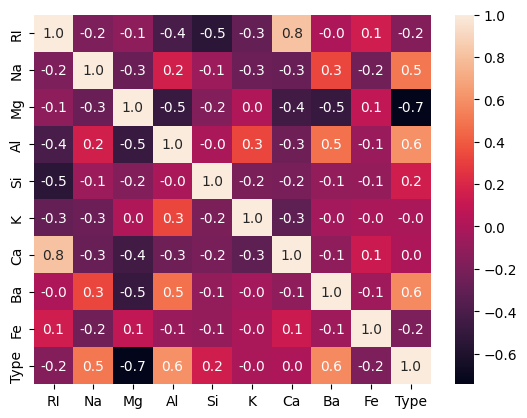

In [178]:
sns.heatmap(glass_corr,annot=True,fmt='.1f')
plt.savefig('heatmap')
plt.show()

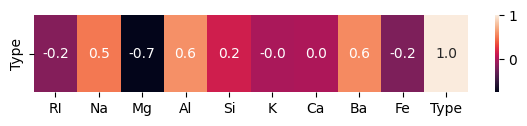

In [179]:
plt.figure(figsize=(7,1))
sns.heatmap(glass_corr.tail(1),annot=True,fmt='.1f')
plt.savefig('heatmap-type')
plt.show()

RI

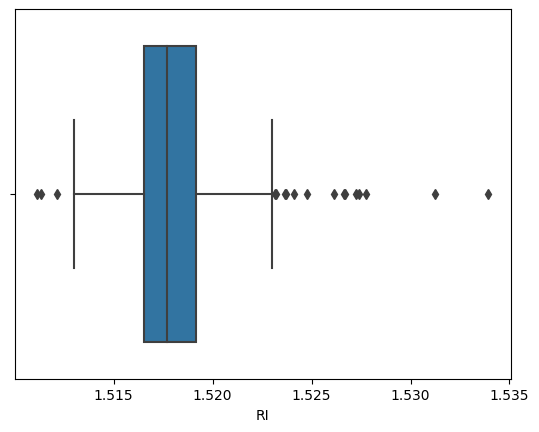

In [180]:
sns.boxplot(x=glass['RI'])
plt.savefig('box-RI')
plt.show()

In [181]:
glass['RI'] = np.where(~glass['RI'].between(1.513,1.522),glass['RI'].median(),glass['RI'])

<AxesSubplot: xlabel='RI'>

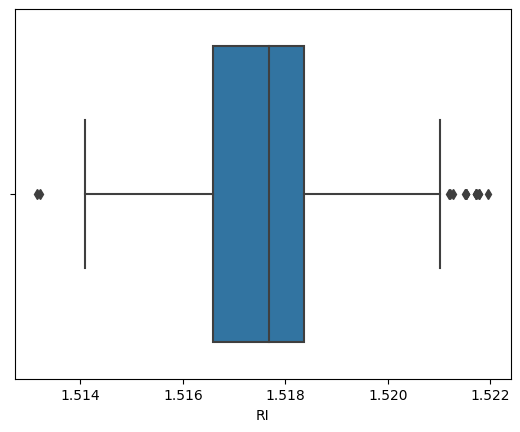

In [182]:
sns.boxplot(x=glass['RI'])

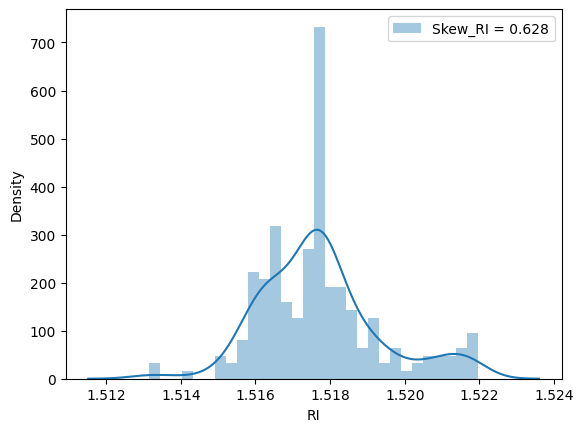

In [183]:
skew_RI= glass['RI'].skew()
sns.distplot(glass['RI'], kde= True, label='Skew_RI = %.3f' %(skew_RI), bins=30)
plt.legend(loc='best')
plt.savefig('Dist-RI')
plt.show()

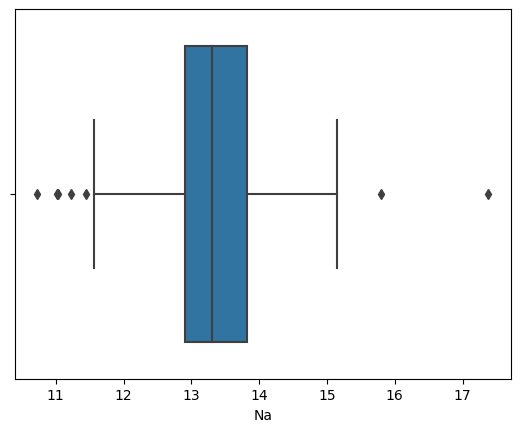

In [184]:
sns.boxplot(x=glass['Na'])
plt.savefig('box-Na')
plt.show()

In [185]:
glass['Na'] = np.where(~glass['Na'].between(11.5,15),glass['Na'].median(),glass['Na'])

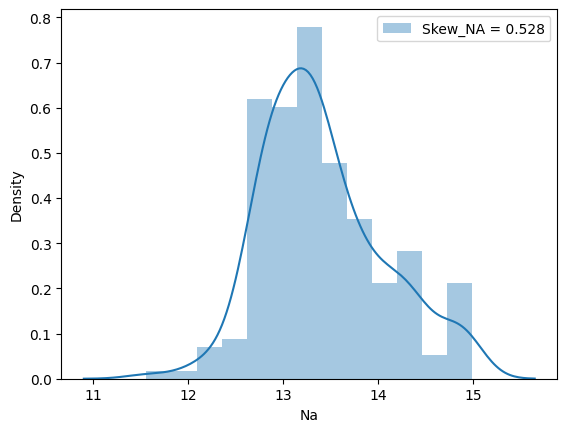

In [186]:
skew_NA = glass['Na'].skew()
sns.distplot(glass['Na'],label='Skew_NA = %.3f'%(skew_NA))
plt.legend(loc='best')
plt.savefig('Dist-Na')
plt.show()

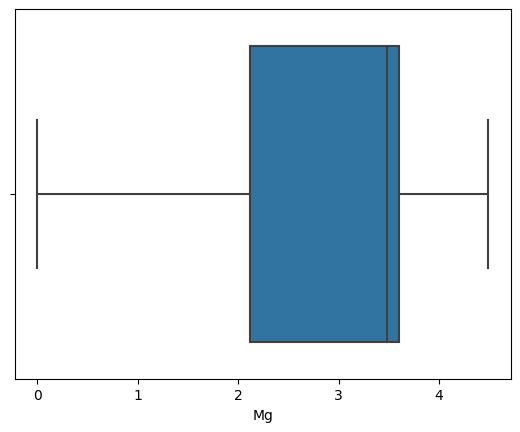

In [187]:
sns.boxplot(x=glass['Mg'])
plt.savefig('box-Mg')
plt.show()

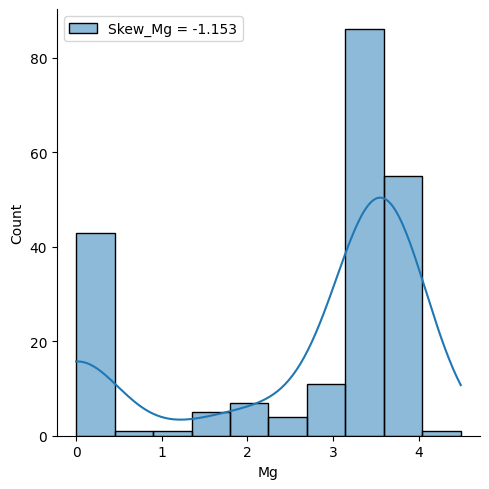

In [188]:
skew_Mg = glass['Mg'].skew()
sns.displot(glass['Mg'],label='Skew_Mg = %.3f'%(skew_Mg),kde=True)
plt.legend(loc='best')
plt.savefig('Dist-Mg')
plt.show()

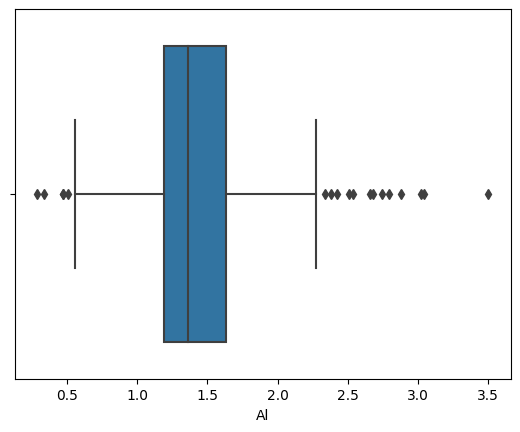

In [189]:
sns.boxplot(x=glass['Al'])
plt.savefig('box-Al')
plt.show()

In [190]:
glass['Al']= np.where(~glass['Al'].between(0.5,2.3),glass['Al'].median(),glass['Al'])

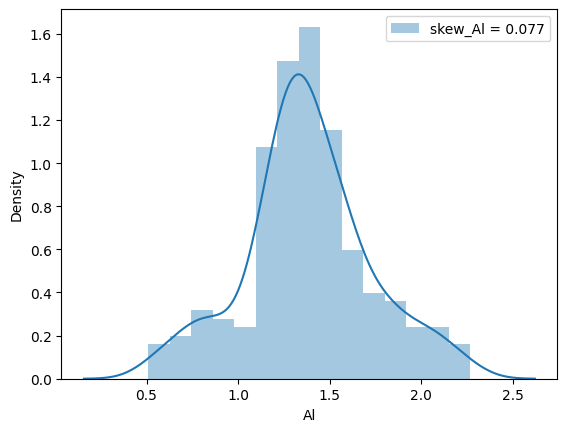

In [191]:
skew_Al = glass['Al'].skew()
sns.distplot(glass['Al'],label='skew_Al = %.3f'%(skew_Al),kde=True)
plt.legend(loc='best')
plt.savefig('Dist-Al')
plt.show()

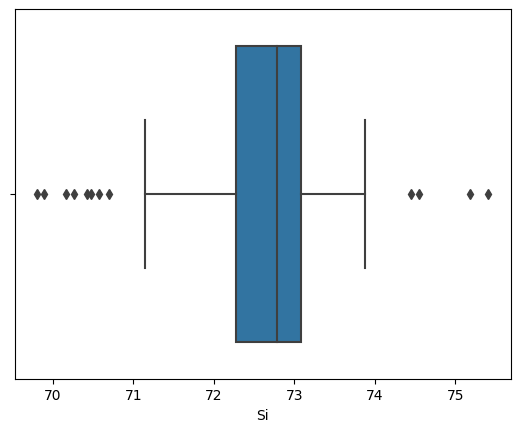

In [192]:
sns.boxplot(x=glass['Si'])
plt.savefig('box-Si')
plt.show()

In [193]:
glass['Si'] = np.where(~glass['Si'].between(71,74),glass['Si'].median(),glass['Si'])

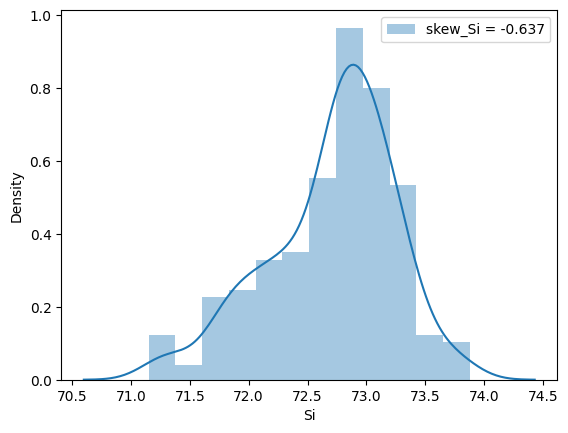

In [194]:
skew_Si = glass['Si'].skew()
sns.distplot(glass['Si'],label='skew_Si = %.3f'%(skew_Si),kde=True)
plt.legend(loc='best')
plt.savefig('Dist-Si')
plt.show()

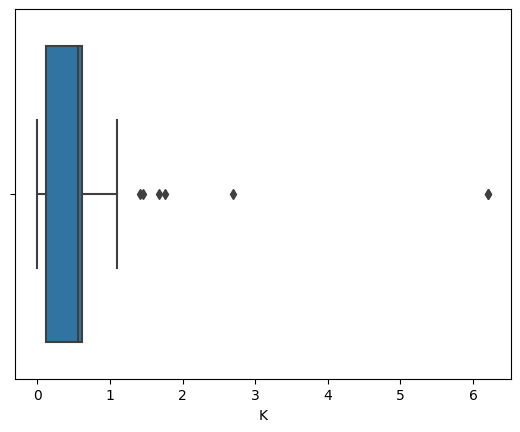

In [195]:
sns.boxplot(x=glass['K'])
plt.savefig('box-K')
plt.show()

In [196]:
glass['K'] = np.where(glass['K']>=1,glass['K'].median(),glass['K'])

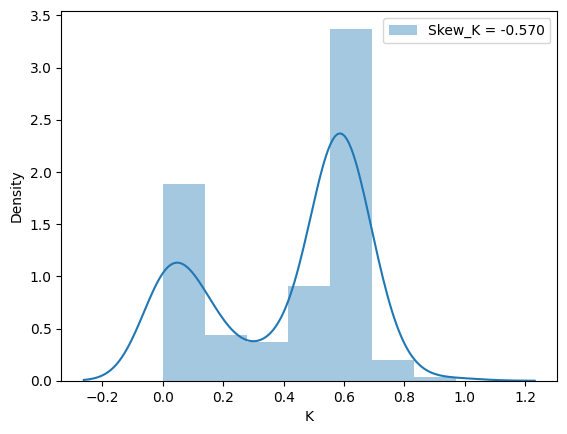

In [197]:
skew_K = glass['K'].skew()
sns.distplot(glass['K'],label='Skew_K = %.3f'%(skew_K))
plt.legend(loc='best')
plt.savefig('Dist-K')
plt.show()

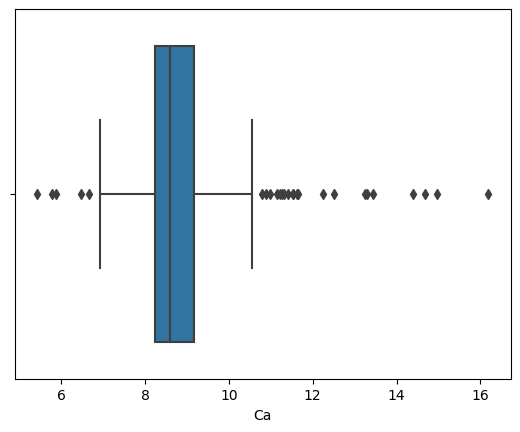

In [198]:
sns.boxplot(x=glass['Ca'])
plt.savefig('box-Ca')
plt.show()

In [199]:
glass['Ca'] = np.where(~glass['Ca'].between(7,10.7),glass['Ca'].median(),glass['Ca'])

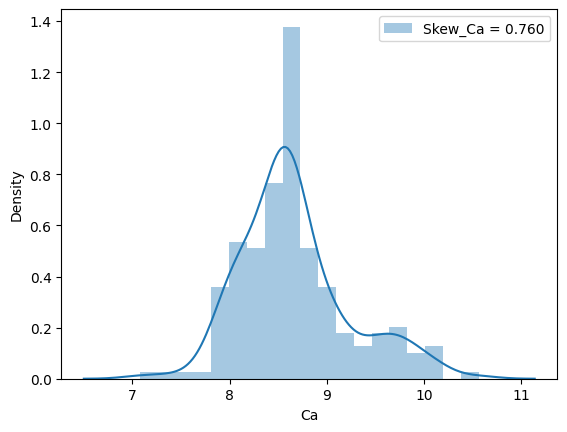

In [200]:
skew_Ca = glass['Ca'].skew()
sns.distplot(glass['Ca'],label='Skew_Ca = %.3f'%(skew_Ca))
plt.legend(loc='best')
plt.savefig('Dist-Ca')
plt.show()

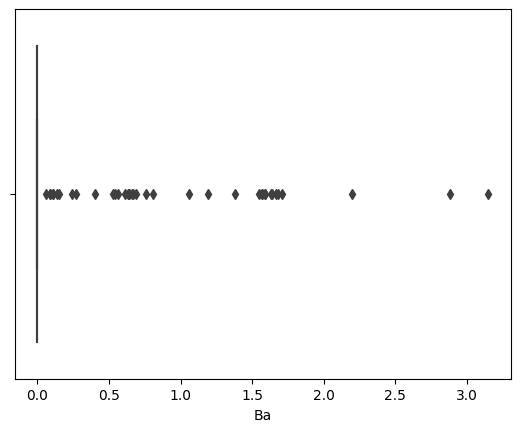

In [201]:
sns.boxplot(x=glass['Ba'])
plt.savefig('box-Ba')
plt.show()

In [202]:
Ba_min,Ba_max,Ba_mean = glass['Ba'].min(),glass['Ba'].max(),glass['Ba'].mean()
print('Min',Ba_min,'\nMax',Ba_max,'\nMean',Ba_mean)

Min 0.0 
Max 3.15 
Mean 0.17504672897196263


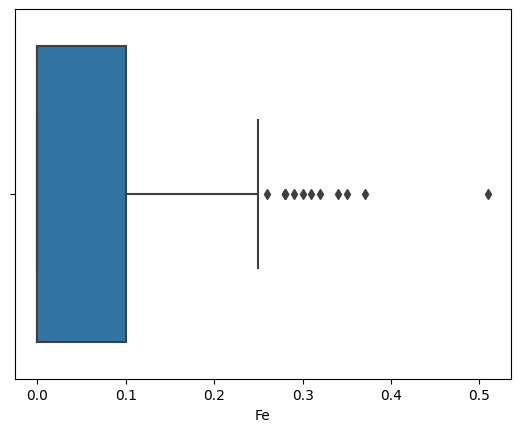

In [203]:
sns.boxplot(x=glass['Fe'])
plt.savefig('box-Fe')
plt.show()

In [204]:
glass['Fe'] = np.where(glass['Fe']>=0.25,glass['Fe'].median(),glass['Fe'])

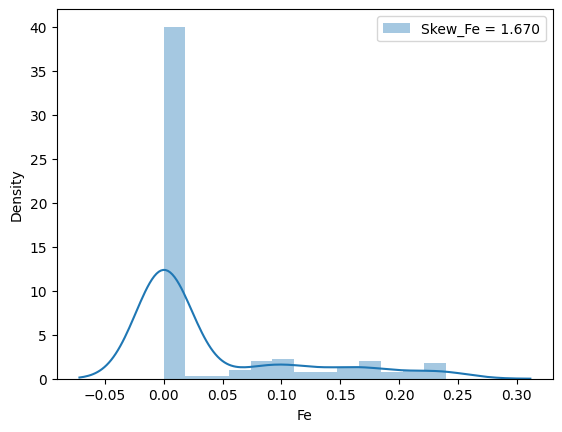

In [205]:
skew_Fe = glass['Fe'].skew()
sns.distplot(glass['Fe'],label='Skew_Fe = %.3f'%(skew_Fe))
plt.legend(loc='best')
plt.savefig('Dist-Fe')
plt.show()

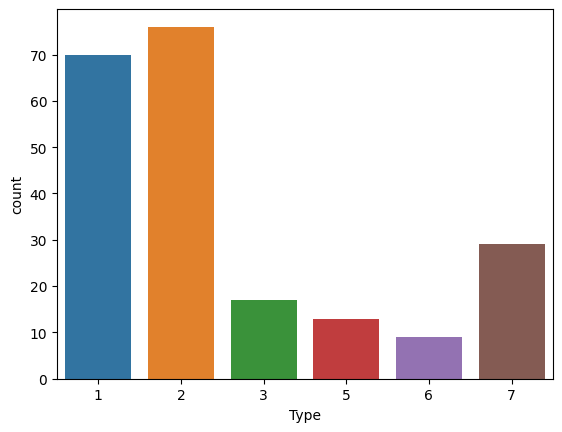

In [206]:
sns.countplot(x=glass['Type'])
plt.savefig('Count-Type')
plt.show()

Train Test Split

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X = glass.drop(['Type'],axis=1)
y = glass['Type']

In [209]:
y.value_counts(normalize=False)

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [210]:
y.value_counts(normalize=True)

2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: Type, dtype: float64

In [211]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2,stratify=y)

In [212]:
print(y_train.shape)
print(y_test.shape)

(171,)
(43,)


In [213]:
y_train.value_counts(normalize=True)

2    0.356725
1    0.327485
7    0.134503
3    0.081871
5    0.058480
6    0.040936
Name: Type, dtype: float64

In [214]:
y_test.value_counts(normalize=True)

2    0.348837
1    0.325581
7    0.139535
5    0.069767
3    0.069767
6    0.046512
Name: Type, dtype: float64

In [215]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [216]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import multilabel_confusion_matrix

1. Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression
lre = LogisticRegression()
lre.fit(X_train,y_train)

print('Training Score_lre :',lre.score(X_train,y_train))
print('Testing Score_lre :',lre.score(X_test,y_test))

y_pred_lre = lre.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_lre)
mse = mean_squared_error(y_test,y_pred_lre)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_lre)
adj_r2 = 1 - (((1-r2)*(X_test.shape[0]-1))/ (X_test.shape[0]-X_test.shape[1]-1))
report = classification_report(y_test,y_pred_lre)
score = accuracy_score(y_test,y_pred_lre)
multi_con_matrix = multilabel_confusion_matrix(y_test,y_pred_lre)
con_matrix = confusion_matrix(y_test,y_pred_lre)

print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('root_mean_squared_error :',rmse)
print('r2_score :',r2)
print('adjusted_r2 :',adj_r2)
print(report)
print('accuracy_score :',score)
print('confusion_matrix :\n',con_matrix)
print('multilabel_confusion_matrix :\n',multi_con_matrix)

Training Score_lre : 0.7076023391812866
Testing Score_lre : 0.7209302325581395
mean_absolute_error : 0.5348837209302325
mean_squared_error : 1.2790697674418605
root_mean_squared_error : 1.1309596665849142
r2_score : 0.7191878413678462
adjusted_r2 : 0.6426027071954405
              precision    recall  f1-score   support

           1       0.67      0.86      0.75        14
           2       0.71      0.80      0.75        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.50      0.67         2
           7       0.86      1.00      0.92         6

    accuracy                           0.72        43
   macro avg       0.54      0.53      0.51        43
weighted avg       0.63      0.72      0.67        43

accuracy_score : 0.7209302325581395
confusion_matrix :
 [[12  2  0  0  0  0]
 [ 3 12  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  2  0  0  0  1]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  6]]
multil

with test_szie = 0.2
accuracy score - 0.6744186046511628
testing score - 0.6744186046511628

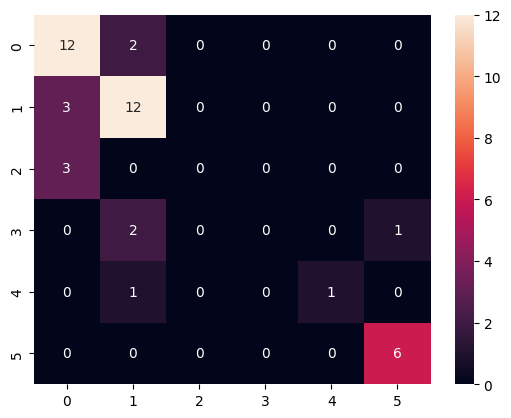

In [218]:
sns.heatmap(con_matrix,annot=True)
plt.savefig('heatmap-con_matrix')
plt.show()

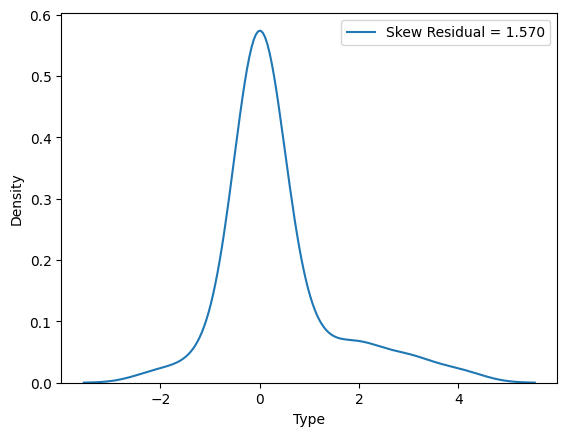

In [219]:
residual_lre = y_test - y_pred_lre
skew_res_lre = residual_lre.skew()
sns.kdeplot(residual_lre,label='Skew Residual = %.3f'%skew_res_lre)
plt.legend()
plt.savefig('kde-residual-lre')
plt.show()

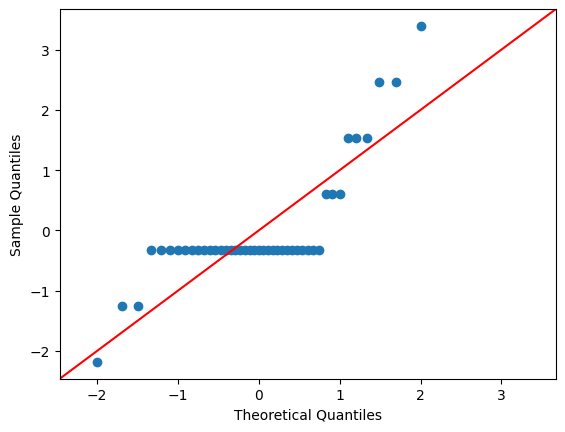

In [220]:
import statsmodels.api as sm

sm.qqplot(residual_lre,line='45',fit=True)
plt.savefig('qqplot-residual_lre')
plt.show()

AUC ROC Curve

In [221]:
y_pred_proba = lre.predict_proba(X_test)
np.around(y_pred_proba,3)


array([[0.002, 0.699, 0.003, 0.244, 0.036, 0.015],
       [0.575, 0.333, 0.08 , 0.005, 0.001, 0.006],
       [0.078, 0.77 , 0.078, 0.037, 0.001, 0.037],
       [0.175, 0.745, 0.054, 0.016, 0.   , 0.009],
       [0.731, 0.195, 0.057, 0.008, 0.001, 0.008],
       [0.397, 0.488, 0.088, 0.009, 0.002, 0.016],
       [0.562, 0.021, 0.408, 0.   , 0.004, 0.006],
       [0.036, 0.711, 0.003, 0.246, 0.004, 0.001],
       [0.017, 0.607, 0.022, 0.014, 0.232, 0.107],
       [0.01 , 0.072, 0.004, 0.   , 0.   , 0.914],
       [0.182, 0.691, 0.098, 0.008, 0.001, 0.019],
       [0.897, 0.022, 0.06 , 0.   , 0.011, 0.01 ],
       [0.045, 0.022, 0.027, 0.009, 0.695, 0.202],
       [0.278, 0.573, 0.113, 0.011, 0.001, 0.024],
       [0.003, 0.151, 0.008, 0.135, 0.06 , 0.643],
       [0.301, 0.644, 0.054, 0.   , 0.   , 0.001],
       [0.   , 0.004, 0.   , 0.002, 0.007, 0.988],
       [0.908, 0.019, 0.057, 0.   , 0.013, 0.002],
       [0.001, 0.958, 0.024, 0.007, 0.004, 0.008],
       [0.665, 0.237, 0.07 , 0.

In [222]:
lre.predict(X_test)

array([2, 1, 2, 2, 1, 2, 1, 2, 2, 7, 2, 1, 6, 2, 7, 2, 7, 1, 2, 1, 2, 2,
       1, 1, 7, 1, 1, 2, 1, 1, 1, 1, 7, 1, 1, 7, 2, 2, 1, 2, 2, 7, 1],
      dtype=int64)

In [223]:
y_train.value_counts().to_dict()

{2: 61, 1: 56, 7: 23, 3: 14, 5: 10, 6: 7}

In [224]:
fpr = {}
tpr = {}
thresh = {}

n_class= 6
for i in range(n_class):
    fpr[i],tpr[i],thresh[i] =roc_curve(y_test,y_pred_proba[:,i],pos_label=i)

fpr

{0: array([0.        , 0.02325581, 1.        ]),
 1: array([0.        , 0.03448276, 0.24137931, 0.24137931, 0.48275862,
        0.48275862, 0.51724138, 0.51724138, 0.5862069 , 0.5862069 ,
        0.62068966, 0.62068966, 0.65517241, 0.65517241, 0.68965517,
        0.68965517, 0.72413793, 0.72413793, 0.89655172, 0.89655172,
        0.93103448, 0.93103448, 1.        ]),
 2: array([0.        , 0.03571429, 0.07142857, 0.07142857, 0.10714286,
        0.10714286, 0.14285714, 0.14285714, 0.21428571, 0.21428571,
        0.28571429, 0.28571429, 0.5       , 0.5       , 0.60714286,
        0.60714286, 0.64285714, 0.64285714, 0.67857143, 0.67857143,
        1.        ]),
 3: array([0.   , 0.025, 0.525, 0.525, 0.875, 0.875, 0.95 , 0.95 , 1.   ]),
 4: array([0.        , 0.02325581, 1.        ]),
 5: array([0.   , 0.025, 0.075, 0.075, 0.475, 0.475, 0.925, 0.925, 1.   ])}

In [225]:
thresh

{0: array([1.90839190e+00, 9.08391896e-01, 4.94024931e-05]),
 1: array([1.98302688, 0.98302688, 0.6913952 , 0.64726613, 0.53833026,
        0.48769462, 0.45165074, 0.37505299, 0.33296081, 0.29389404,
        0.27994818, 0.27321799, 0.27186284, 0.19544492, 0.1510597 ,
        0.07665305, 0.07181409, 0.04930838, 0.02167758, 0.02064558,
        0.01886489, 0.01563395, 0.00198697]),
 2: array([1.40770946e+00, 4.07709459e-01, 2.62501977e-01, 1.54310862e-01,
        1.53229065e-01, 1.36027421e-01, 1.30957169e-01, 1.13372665e-01,
        1.01908316e-01, 9.57685744e-02, 8.77839588e-02, 7.76961022e-02,
        5.67857735e-02, 5.37333678e-02, 5.05219018e-02, 4.45862605e-02,
        2.70767038e-02, 2.35808867e-02, 2.17234973e-02, 8.31412311e-03,
        8.86606683e-05]),
 3: array([1.24600650e+00, 2.46006499e-01, 8.16559821e-03, 8.07549467e-03,
        2.82204092e-04, 2.65158760e-04, 8.06852561e-05, 8.06455562e-05,
        2.22989678e-05]),
 4: array([1.69522890e+00, 6.95228903e-01, 3.24698901e-0

In [226]:
tpr

{0: array([nan, nan, nan]),
 1: array([0.        , 0.        , 0.        , 0.07142857, 0.07142857,
        0.14285714, 0.14285714, 0.21428571, 0.21428571, 0.28571429,
        0.28571429, 0.35714286, 0.35714286, 0.71428571, 0.71428571,
        0.78571429, 0.78571429, 0.85714286, 0.85714286, 0.92857143,
        0.92857143, 1.        , 1.        ]),
 2: array([0.        , 0.        , 0.        , 0.13333333, 0.13333333,
        0.26666667, 0.26666667, 0.33333333, 0.33333333, 0.46666667,
        0.46666667, 0.6       , 0.6       , 0.73333333, 0.73333333,
        0.8       , 0.8       , 0.86666667, 0.86666667, 1.        ,
        1.        ]),
 3: array([0.        , 0.        , 0.        , 0.33333333, 0.33333333,
        0.66666667, 0.66666667, 1.        , 1.        ]),
 4: array([nan, nan, nan]),
 5: array([0.        , 0.        , 0.        , 0.33333333, 0.33333333,
        0.66666667, 0.66666667, 1.        , 1.        ])}

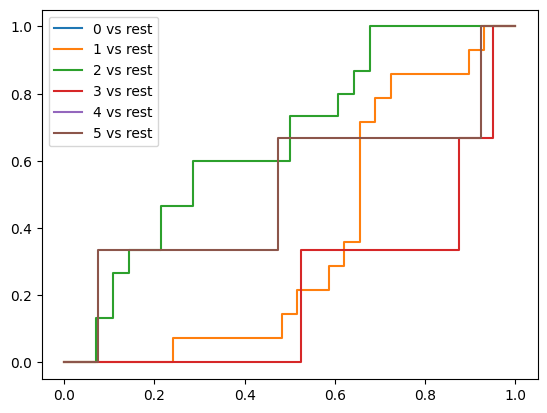

In [227]:
#plotting
plt.plot(fpr[0],tpr[0],label='0 vs rest')
plt.plot(fpr[1],tpr[1],label='1 vs rest')
plt.plot(fpr[2],tpr[2],label='2 vs rest')
plt.plot(fpr[3],tpr[3],label='3 vs rest')
plt.plot(fpr[4],tpr[4],label='4 vs rest')
plt.plot(fpr[5],tpr[5],label='5 vs rest')
# plt.plot(fpr[6],tpr[6],label='6 vs rest')
# plt.plot(fpr[7],tpr[7],label='7 vs rest')

plt.legend()
plt.savefig('ROC')
plt.show()

2. K Nearest Neighbor

In [228]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

print('Training Score_knn :',knn.score(X_train,y_train))
print('Testing Score_knn :',knn.score(X_test,y_test))

y_pred_knn = knn.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_knn)
mse = mean_squared_error(y_test,y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_knn)
adj_r2 = 1 - (((1-r2)*(X_test.shape[0]-1))/ (X_test.shape[0]-X_test.shape[1]-1))
report = classification_report(y_test,y_pred_knn)
score = accuracy_score(y_test,y_pred_knn)
multi_con_matrix = multilabel_confusion_matrix(y_test,y_pred_knn)
con_matrix = confusion_matrix(y_test,y_pred_knn)

print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('root_mean_squared_error :',rmse)
print('r2_score :',r2)
print('adjusted_r2 :',adj_r2)
print(report)
print('accuracy_score :',score)
print('confusion_matrix :\n',con_matrix)
print('multilabel_confusion_matrix :\n',multi_con_matrix)

Training Score_knn : 0.6666666666666666
Testing Score_knn : 0.813953488372093
mean_absolute_error : 0.27906976744186046
mean_squared_error : 0.46511627906976744
root_mean_squared_error : 0.6819943394704735
r2_score : 0.8978864877701259
adjusted_r2 : 0.8700373480710694
              precision    recall  f1-score   support

           1       0.67      1.00      0.80        14
           2       1.00      0.73      0.85        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.81        43
   macro avg       0.75      0.73      0.73        43
weighted avg       0.80      0.81      0.79        43

accuracy_score : 0.813953488372093
confusion_matrix :
 [[14  0  0  0  0  0]
 [ 4 11  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
multil

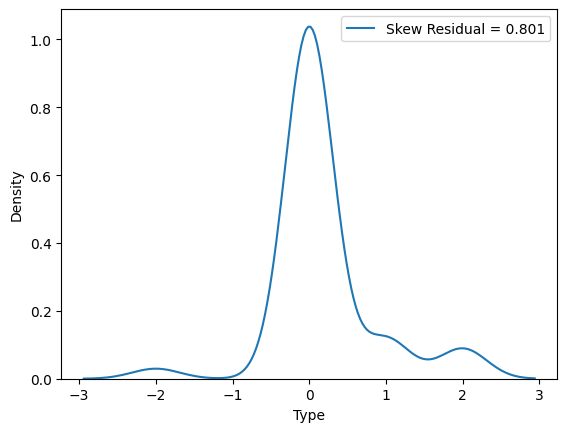

In [229]:
residual_knn = y_test - y_pred_knn
skew_res_knn = residual_knn.skew()
sns.kdeplot(residual_knn,label='Skew Residual = %.3f'%skew_res_knn)
plt.legend()
plt.savefig('kde-residual-knn')
plt.show()

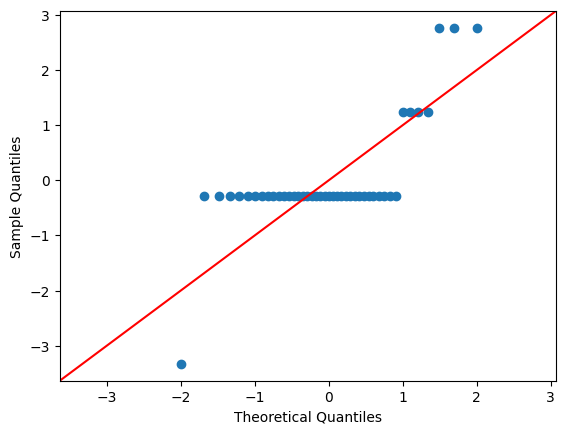

In [230]:
sm.qqplot(residual_knn,line='45',fit=True)
plt.savefig('qqplot-residual_knn')
plt.show()

3. Decision Tree

In [231]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=2,criterion='gini')
tree.fit(X_train,y_train)

print('Training Score_tree :',tree.score(X_train,y_train))
print('Testing Score_tree :',tree.score(X_test,y_test))

y_pred_tree = tree.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_tree)
mse = mean_squared_error(y_test,y_pred_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_tree)
adj_r2 = 1 - (((1-r2)*(X_test.shape[0]-1))/ (X_test.shape[0]-X_test.shape[1]-1))
report = classification_report(y_test,y_pred_tree)
score = accuracy_score(y_test,y_pred_tree)
multi_con_matrix = multilabel_confusion_matrix(y_test,y_pred_tree)
con_matrix = confusion_matrix(y_test,y_pred_tree)

print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('root_mean_squared_error :',rmse)
print('r2_score :',r2)
print('adjusted_r2 :',adj_r2)
print(report)
print('accuracy_score :',score)
print('confusion_matrix :\n',con_matrix)
print('multilabel_confusion_matrix :\n',multi_con_matrix)

Training Score_tree : 1.0
Testing Score_tree : 0.7674418604651163
mean_absolute_error : 0.5813953488372093
mean_squared_error : 2.0232558139534884
root_mean_squared_error : 1.4224119705463283
r2_score : 0.5558062218000477
adjusted_r2 : 0.43466246410915155
              precision    recall  f1-score   support

           1       0.80      0.86      0.83        14
           2       1.00      0.67      0.80        15
           3       0.50      0.67      0.57         3
           5       1.00      0.33      0.50         3
           6       0.50      1.00      0.67         2
           7       0.67      1.00      0.80         6

    accuracy                           0.77        43
   macro avg       0.74      0.75      0.69        43
weighted avg       0.83      0.77      0.77        43

accuracy_score : 0.7674418604651163
confusion_matrix :
 [[12  0  1  0  0  1]
 [ 2 10  1  0  2  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  1  0  2]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
multilabel_confusi

4. Random Forest Classifier

In [232]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2,criterion='gini')
rfc.fit(X_train,y_train)

print('Training Score_rfc :',rfc.score(X_train,y_train))
print('Testing Score_rfc :',rfc.score(X_test,y_test))

y_pred_rfc = rfc.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_rfc)
mse = mean_squared_error(y_test,y_pred_rfc)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_rfc)
adj_r2 = 1 - (((1-r2)*(X_test.shape[0]-1))/ (X_test.shape[0]-X_test.shape[1]-1))
report = classification_report(y_test,y_pred_rfc)
score = accuracy_score(y_test,y_pred_rfc)
multi_con_matrix = multilabel_confusion_matrix(y_test,y_pred_rfc)
con_matrix = confusion_matrix(y_test,y_pred_rfc)

print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('root_mean_squared_error :',rmse)
print('r2_score :',r2)
print('adjusted_r2 :',adj_r2)
print(report)
print('accuracy_score :',score)
print('confusion_matrix :\n',con_matrix)
print('multilabel_confusion_matrix :\n',multi_con_matrix)

Training Score_rfc : 1.0
Testing Score_rfc : 0.813953488372093
mean_absolute_error : 0.32558139534883723
mean_squared_error : 0.6511627906976745
root_mean_squared_error : 0.806946584785929
r2_score : 0.8570410828781763
adjusted_r2 : 0.8180522872994971
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        14
           2       0.92      0.80      0.86        15
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.81        43
   macro avg       0.75      0.69      0.69        43
weighted avg       0.80      0.81      0.79        43

accuracy_score : 0.813953488372093
confusion_matrix :
 [[14  0  0  0  0  0]
 [ 2 12  1  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
multilabel_confusion_ma

5. Support Vector Mechanism

In [233]:
from sklearn.svm import SVC
svm = SVC(kernel='linear',random_state=0)
svm.fit(X_train,y_train)

print('Training Score_svm :',svm.score(X_train,y_train))
print('Testing Score_svm :',svm.score(X_test,y_test))

y_pred_svm = svm.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_svm)
mse = mean_squared_error(y_test,y_pred_svm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_svm)
adj_r2 = 1 - (((1-r2)*(X_test.shape[0]-1))/ (X_test.shape[0]-X_test.shape[1]-1))
report = classification_report(y_test,y_pred_svm)
score = accuracy_score(y_test,y_pred_svm)
multi_con_matrix = multilabel_confusion_matrix(y_test,y_pred_svm)
con_matrix = confusion_matrix(y_test,y_pred_svm)

print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('root_mean_squared_error :',rmse)
print('r2_score :',r2)
print('adjusted_r2 :',adj_r2)
print(report)
print('accuracy_score :',score)
print('confusion_matrix :\n',con_matrix)
print('multilabel_confusion_matrix :\n',multi_con_matrix)

Training Score_svm : 0.7485380116959064
Testing Score_svm : 0.7674418604651163
mean_absolute_error : 0.4186046511627907
mean_squared_error : 0.9767441860465116
root_mean_squared_error : 0.9883036912035246
r2_score : 0.7855616243172644
adjusted_r2 : 0.7270784309492456
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.72      0.87      0.79        15
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.50      0.67         2
           7       0.86      1.00      0.92         6

    accuracy                           0.77        43
   macro avg       0.72      0.59      0.61        43
weighted avg       0.73      0.77      0.73        43

accuracy_score : 0.7674418604651163
confusion_matrix :
 [[12  2  0  0  0  0]
 [ 2 13  0  0  0  0]
 [ 2  1  0  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  6]]
multil

6. Naive Bayes

In [234]:
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(X_train,y_train)

print('Training Score_nb :',nb.score(X_train,y_train))
print('Testing Score_nb :',nb.score(X_test,y_test))

y_pred_nb = nb.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_nb)
mse = mean_squared_error(y_test,y_pred_nb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_nb)
adj_r2 = 1 - (((1-r2)*(X_test.shape[0]-1))/ (X_test.shape[0]-X_test.shape[1]-1))
report = classification_report(y_test,y_pred_nb)
score = accuracy_score(y_test,y_pred_nb)
multi_con_matrix = multilabel_confusion_matrix(y_test,y_pred_nb)
con_matrix = confusion_matrix(y_test,y_pred_nb)

print('mean_absolute_error :',mae)
print('mean_squared_error :',mse)
print('root_mean_squared_error :',rmse)
print('r2_score :',r2)
print('adjusted_r2 :',adj_r2)
print(report)
print('accuracy_score :',score)
print('confusion_matrix :\n',con_matrix)
print('multilabel_confusion_matrix :\n',multi_con_matrix)

Training Score_nb : 0.5380116959064327
Testing Score_nb : 0.5813953488372093
mean_absolute_error : 0.8604651162790697
mean_squared_error : 2.116279069767442
root_mean_squared_error : 1.4547436440031083
r2_score : 0.5353835193540728
adjusted_r2 : 0.40866993372336535
              precision    recall  f1-score   support

           1       0.67      0.71      0.69        14
           2       1.00      0.20      0.33        15
           3       0.25      0.67      0.36         3
           5       0.29      0.67      0.40         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.58        43
   macro avg       0.62      0.71      0.58        43
weighted avg       0.75      0.58      0.56        43

accuracy_score : 0.5813953488372093
confusion_matrix :
 [[10  0  4  0  0  0]
 [ 4  3  2  5  1  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
multilab

In [235]:

# Training Score_lre : 0.6257309941520468
# Testing Score_lre : 0.6744186046511628

# Training Score_nb : 0.5789473684210527
# Testing Score_nb : 0.5581395348837209

# Training Score_svm : 0.7309941520467836
# Testing Score_svm : 0.6976744186046512

# Training Score_rfc : 1.0
# Testing Score_rfc : 0.813953488372093

# Training Score_tree : 1.0
# Testing Score_tree : 0.7674418604651163

# Training Score_knn : 0.672514619883041
# Testing Score_knn : 0.6976744186046512

